In [32]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Import Modules

In [34]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')  #igonre all warnings

load the dataset

In [35]:
paths = []
labels = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1] #split based on the _ and get the last one
        label = label.split('.')[0] #split based on the . and get the first one.
        labels.append((label.lower()))


print('Dataset is loaded')

Dataset is loaded


In [36]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_knock_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_gaze_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_hurl_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_soup_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_reach_fear.wav']

In [37]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [38]:
# creating a dataframe

df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [39]:
df['label'].value_counts()

fear       800
angry      800
disgust    800
sad        800
neutral    800
ps         800
happy      800
Name: label, dtype: int64

Exploratory Data Analysis

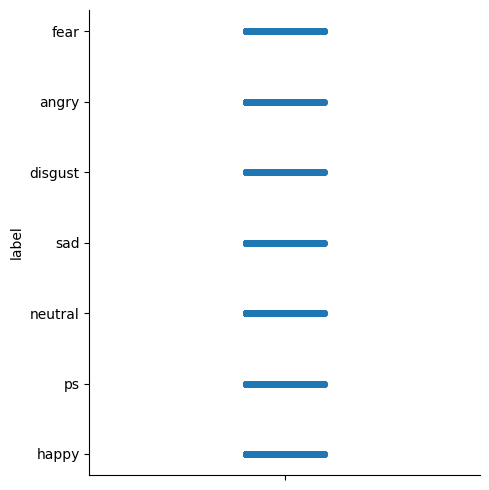

In [40]:
sns.catplot(df['label'])

In [41]:
# display the waveplot

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()




def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

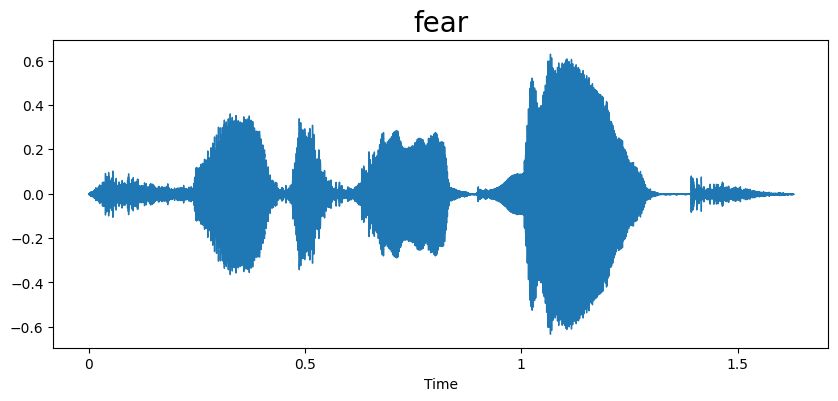

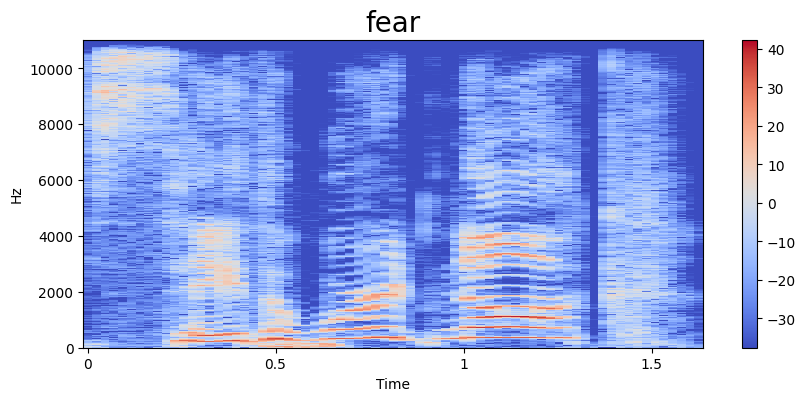

In [42]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]

# load the data and sampling rate
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path) #listen to the audio

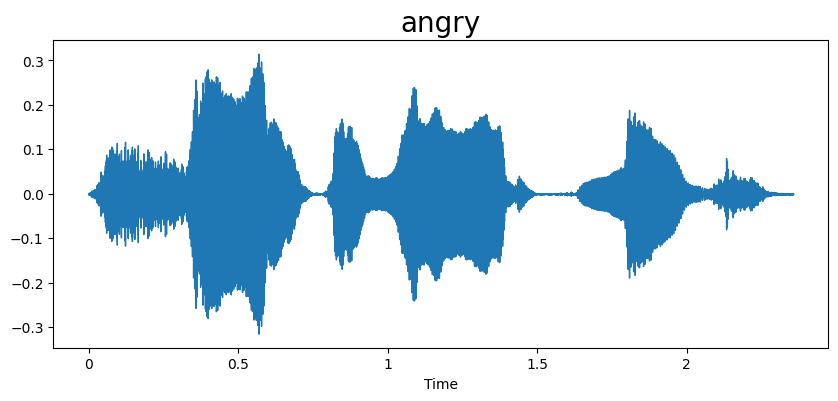

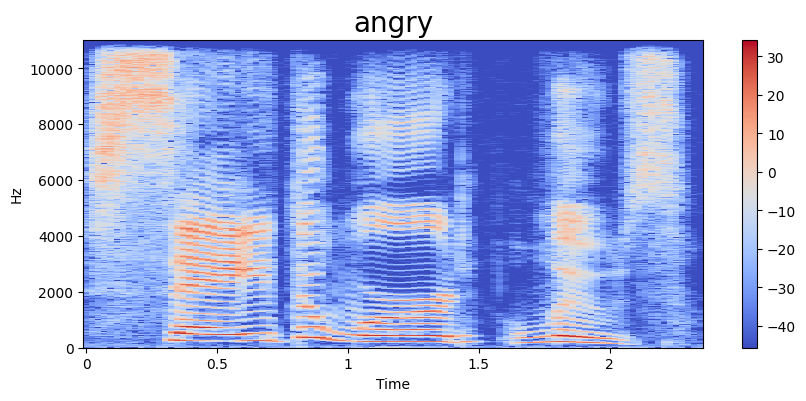

In [43]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[1]

# load the data and sampling rate
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path) #listen to the audio

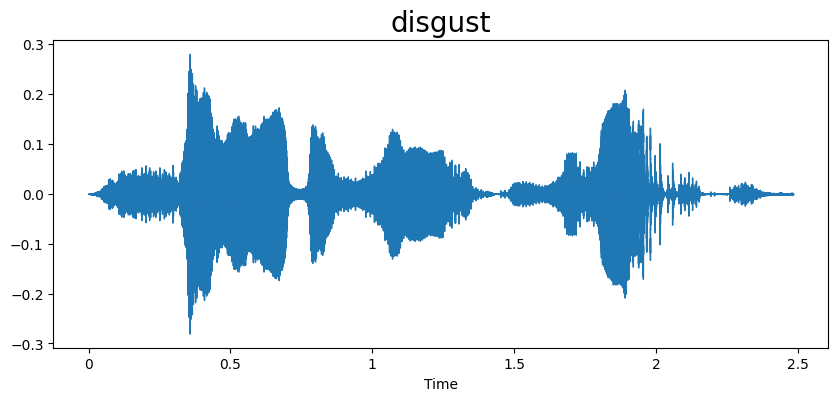

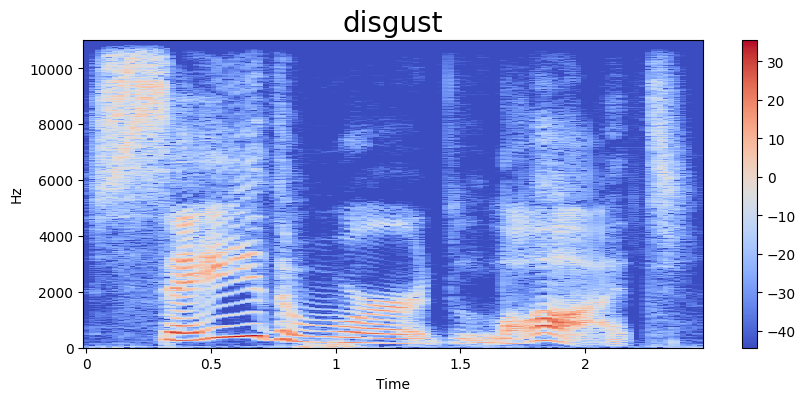

In [44]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[1]

# load the data and sampling rate
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path) #listen to the audio

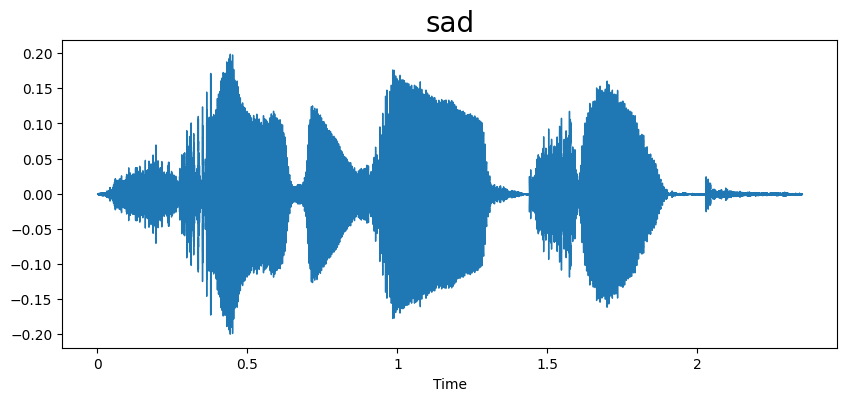

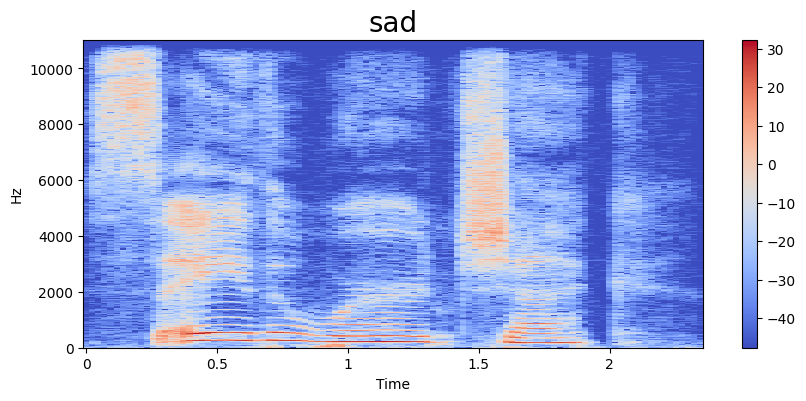

In [45]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[1]

# load the data and sampling rate
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path) #listen to the audio

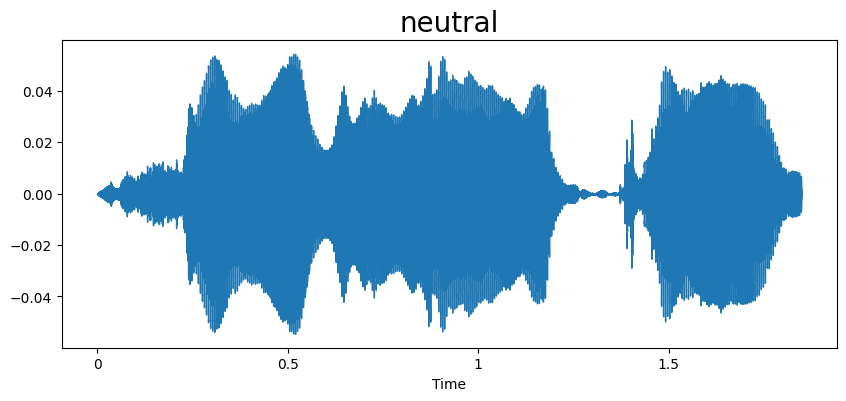

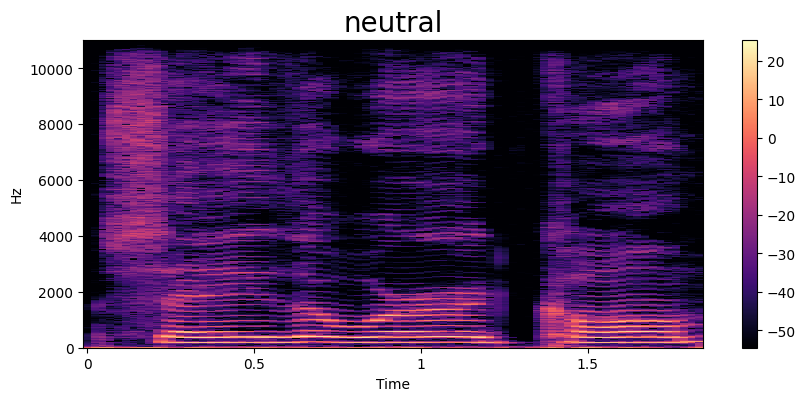

In [46]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]

# load the data and sampling rate
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path) #listen to the audio

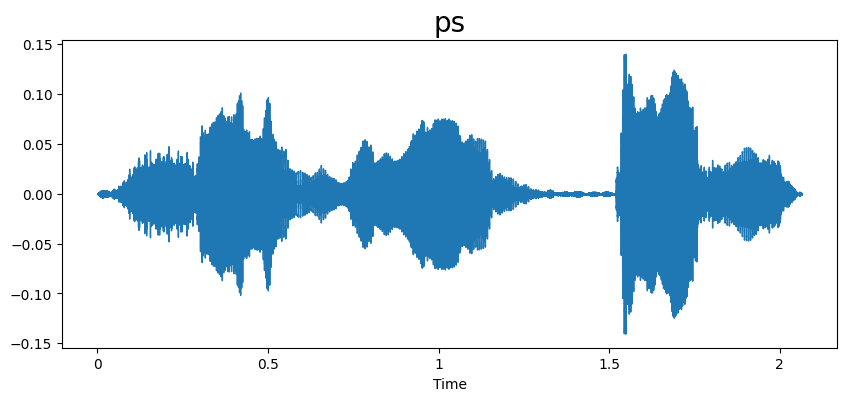

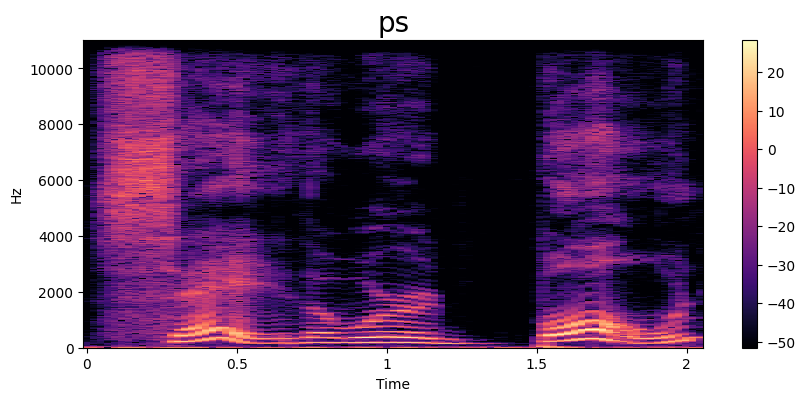

In [47]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[1]

# load the data and sampling rate
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path) #listen to the audio

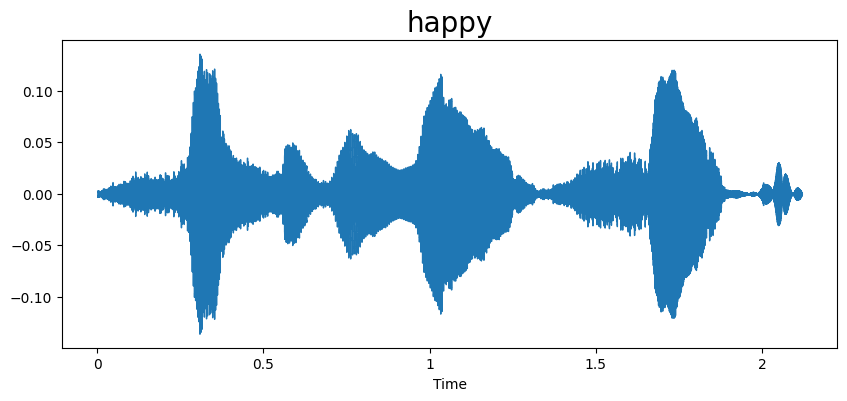

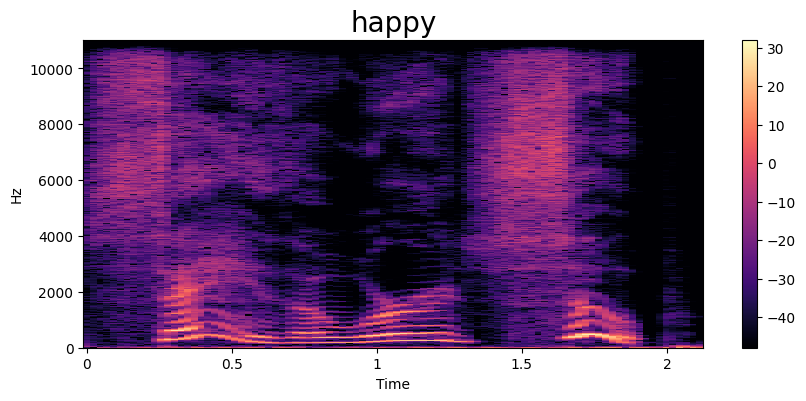

In [48]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[1]

# load the data and sampling rate
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path) #listen to the audio

Feature Extraction


In [12]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [13]:
extract_mfcc(df['speech'][0])

array([-292.78122   ,   73.24398   ,  -21.521925  ,    8.403791  ,
         -6.231571  ,    7.233018  ,    0.5528573 ,  -13.164889  ,
        -11.824239  ,    5.512315  ,  -13.527852  ,   -6.56884   ,
          2.0673652 ,   -5.2598243 ,   -9.53143   ,   -4.2172236 ,
         -7.114667  ,   11.057597  ,    5.7150254 ,   20.957468  ,
         21.476278  ,    9.392769  ,   -4.0176344 ,   -2.9623775 ,
         -3.5008707 ,    8.17703   ,   -0.61436635,   -7.0179977 ,
        -10.2325945 ,   -1.0082421 ,   -4.376161  ,    0.6159543 ,
        -11.196672  ,   -4.265226  ,   -2.2332292 ,    2.0780768 ,
          1.8635942 ,    6.055704  ,    9.247566  ,    5.911509  ],
      dtype=float32)

In [14]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [15]:
X_mfcc

0       [-292.78122, 73.24398, -21.521925, 8.403791, -...
1       [-351.61877, 31.827068, -10.738753, 20.982134,...
2       [-245.71211, 85.28927, -19.913054, -19.497898,...
3       [-344.21515, 48.95972, -0.9484395, 10.773415, ...
4       [-310.5112, 31.590977, -11.891261, 25.913258, ...
                              ...                        
5595    [-500.02167, 88.52622, 12.195099, 6.4623337, 2...
5596    [-424.09842, 108.50868, 20.40622, -2.1675665, ...
5597    [-487.92188, 93.83909, 13.854393, -2.303121, 9...
5598    [-455.0675, 121.302925, 19.078344, -5.3150196,...
5599    [-373.36633, 104.38417, 9.498308, -14.104967, ...
Name: speech, Length: 5600, dtype: object

In [16]:
#convert to 2D numpy array
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [17]:
#input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [18]:
from keras.utils import to_categorical
df['label'], _ = df['label'].factorize() # convert string labels to integer values
y = to_categorical(df['label'])
y.shape


(5600, 7)

In [19]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, concatenate
from keras.utils import to_categorical

# Define the base convolutional network
def base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv1D(32, kernel_size=3, activation='relu')(input)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(64, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    return Model(input, x)

# Define the two input branches
input_a = Input(shape=(40, 1))
input_b = Input(shape=(40, 1))

# Share weights between the two branches
base_network_a = base_network(input_a.shape[1:])
base_network_b = base_network(input_b.shape[1:])

# Process each input through the base network
processed_a = base_network_a(input_a)
processed_b = base_network_b(input_b)

# Concatenate the outputs of the two branches
merged_output = concatenate([processed_a, processed_b])

# Add more layers for similarity comparison
x = Dense(64, activation='relu')(merged_output)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(7, activation='softmax')(x)  # Output layer with 7 classes for classification

# Define the Siamese model
siamese_model = Model(inputs=[input_a, input_b], outputs=output)

siamese_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
siamese_model.summary()

# Train the Siamese model
history = siamese_model.fit([X, X], y, validation_split=0.2, epochs=100, batch_size=16, shuffle=True)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 40, 1)]              0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 40, 1)]              0         []                            
                                                                                                  
 model (Functional)          (None, 32)                   41248     ['input_1[0][0]']             
                                                                                                  
 model_1 (Functional)        (None, 32)                   41248     ['input_2[0][0]']             
                                                                                            

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy = siamese_model.evaluate([X_test, X_test], y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


35/35 [==============================] - 1s 3ms/step - loss: 1.9155e-05 - accuracy: 1.0000
Test Loss: 1.9154644178343005e-05
Test Accuracy: 1.0


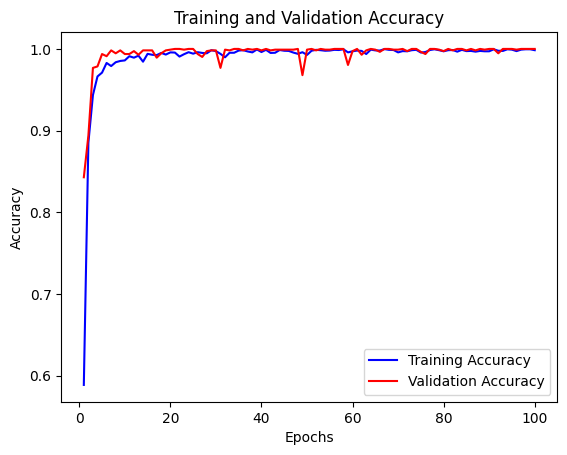

In [20]:
import matplotlib.pyplot as plt

# Get training and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
